## "Analyzing Differential Adverse Reactions among Covishield, Covaxin and Sputnik V Recipients: Insights from Machine Learning and Epidemiological Analysis"

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('vaccine.csv')
data.head(10)

,AGE,GENDER,HEALTH CONDITION,LOCATION,VACCINE_TYPE,VACCINATION_DATE,ADVERSE_REACTION
0,45,Male,Diabetes,Maharashtra,Covaxin,15-04-2024,NaN
1,32,Female,NaN,Tamil Nadu,Covishield,16-04-2024,Fatigue
2,55,Female,Hypertension,Karnataka,Sputnik V,17-04-2024,Headache
3,28,Male,Obesity,Gujarat,Covaxin,18-04-2024,Fever
4,40,Female,Asthma,Uttar Pradesh,Covishield,19-04-2024,NaN
5,22,Male,NaN,Rajasthan,Sputnik V,20-04-2024,Chills
6,35,Female,Diabetes,Andhra Pradesh,Covaxin,21-04-2024,NaN
7,48,Male,Hypertension,West Bengal,Covishield,22-04-2024,Sore Arm
8,39,Female,NaN,Kerala,Sputnik V,23-04-2024,NaN
9,50,Male,Heart Disease,Madhya Pradesh,Covaxin,24-04-2024,Fatigue


## data preprocessing

In [136]:
data = data.dropna() 

data['GENDER'] = data['GENDER'].map({'Male': 0, 'Female': 1})
data['VACCINE_TYPE'] = data['VACCINE_TYPE'].map({'Covishield': 0, 'Covaxin': 1, 'Sputnik V': 2})
data['VACCINATION_DATE'] = pd.to_datetime(data['VACCINATION_DATE'])


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21968\557642740.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['VACCINATION_DATE'] = pd.to_datetime(data['VACCINATION_DATE'])


In [137]:
data.head()

,AGE,GENDER,HEALTH CONDITION,LOCATION,VACCINE_TYPE,VACCINATION_DATE,ADVERSE_REACTION
2,55,1,Hypertension,Karnataka,2,2024-04-17,Headache
3,28,0,Obesity,Gujarat,1,2024-04-18,Fever
7,48,0,Hypertension,West Bengal,0,2024-04-22,Sore Arm
9,50,0,Heart Disease,Madhya Pradesh,1,2024-04-24,Fatigue
11,60,0,Asthma,Haryana,2,2024-04-26,Fever


In [138]:
data.dropna()

,AGE,GENDER,HEALTH CONDITION,LOCATION,VACCINE_TYPE,VACCINATION_DATE,ADVERSE_REACTION
2,55,1,Hypertension,Karnataka,2,2024-04-17,Headache
3,28,0,Obesity,Gujarat,1,2024-04-18,Fever
7,48,0,Hypertension,West Bengal,0,2024-04-22,Sore Arm
9,50,0,Heart Disease,Madhya Pradesh,1,2024-04-24,Fatigue
11,60,0,Asthma,Haryana,2,2024-04-26,Fever
13,42,1,Diabetes,Bihar,0,2024-04-28,Sore Arm
15,27,1,Obesity,Assam,1,2024-04-30,Chills
16,44,0,Heart Disease,Chhattisgarh,0,2024-05-01,Fatigue
18,52,0,Asthma,Uttarakhand,1,2024-05-03,Fever
20,41,0,Hypertension,Telangana,2,2024-05-05,Sore Arm


Text(0, 0.5, 'Vaccination Date')

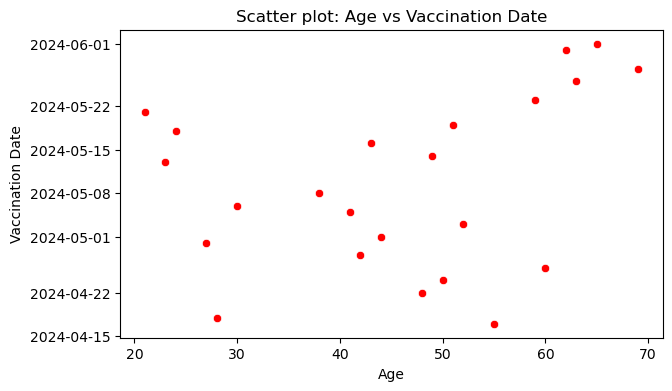

In [139]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='AGE', y='VACCINATION_DATE', data=data, color='red')
plt.title('Scatter plot: Age vs Vaccination Date')
plt.xlabel('Age')
plt.ylabel('Vaccination Date')

Text(0, 0.5, 'Gender (0: Male, 1: Female)')

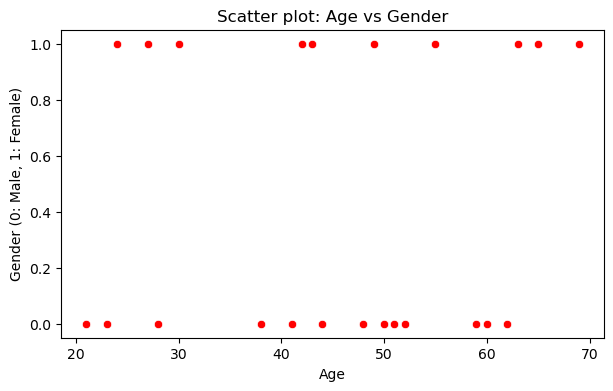

In [140]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='AGE', y='GENDER', data=data, color='red')
plt.title('Scatter plot: Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender (0: Male, 1: Female)')

Text(0, 0.5, 'Age')

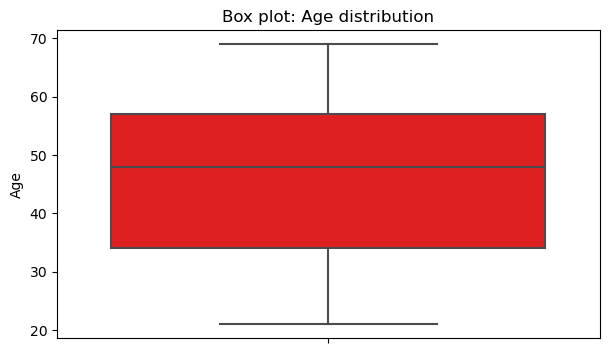

In [141]:
plt.figure(figsize=(7, 4))
sns.boxplot(y='AGE', data=data, color='red')
plt.title('Box plot: Age distribution')
plt.ylabel('Age')

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


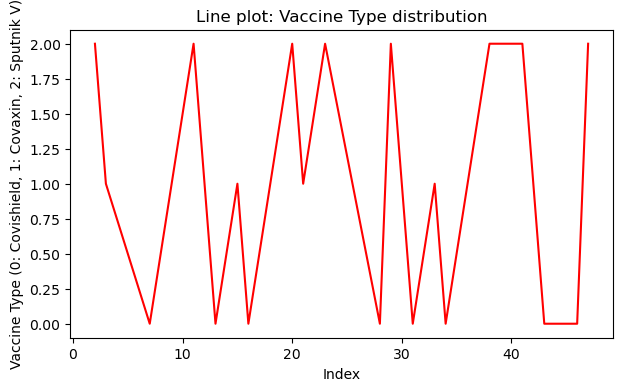

In [142]:
plt.figure(figsize=(7, 4))
sns.lineplot(x=data.index, y='VACCINE_TYPE', data=data, color='red')
plt.title('Line plot: Vaccine Type distribution')
plt.xlabel('Index') 
plt.ylabel('Vaccine Type (0: Covishield, 1: Covaxin, 2: Sputnik V)')

plt.show()

In [24]:
x = data[['AGE', 'GENDER', 'VACCINE_TYPE']]
y = data['ADVERSE_REACTION']

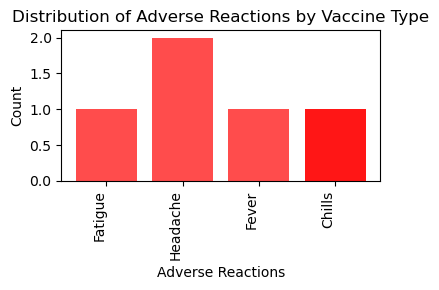

In [151]:
covishield_data = { "Fatigue": 1, "Headache": 2}
covaxin_data = {"Fever": 1,"Chills": 1,"Headache": 0}
sputnik_data = { "Headache": 0, "Chills": 1}
plt.figure(figsize=(4, 3))
plt.bar(covishield_data.keys(), covishield_data.values(), color='red', alpha=0.7, label='Covishield')
plt.bar(covaxin_data.keys(), covaxin_data.values(), color='red', alpha=0.7, label='Covaxin')
plt.bar(sputnik_data.keys(), sputnik_data.values(), color='red', alpha=0.7, label='Sputnik V')
plt.title('Distribution of Adverse Reactions by Vaccine Type')
plt.xlabel('Adverse Reactions')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

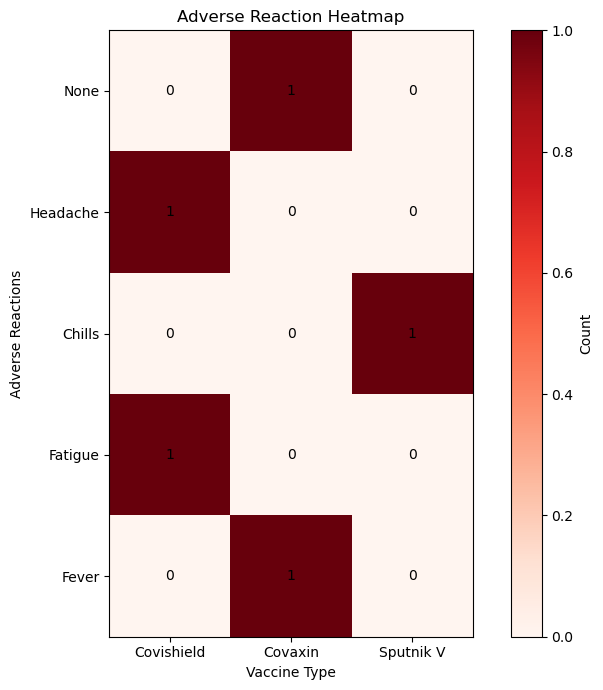

In [127]:
adverse_reactions = list(set(covishield_data.keys()) | set(covaxin_data.keys()) | set(sputnik_data.keys()))
vaccine_types = ['Covishield', 'Covaxin', 'Sputnik V']

data = [[covishield_data.get(reaction, 0), covaxin_data.get(reaction, 0), sputnik_data.get(reaction, 0)] for reaction in adverse_reactions]

plt.figure(figsize=(8, 7))
plt.imshow(data, cmap='Reds')

plt.xticks(range(len(vaccine_types)), vaccine_types)
plt.yticks(range(len(adverse_reactions)), adverse_reactions)
plt.xlabel('Vaccine Type')
plt.ylabel('Adverse Reactions')
plt.title('Adverse Reaction Heatmap')

for i in range(len(adverse_reactions)):
    for j in range(len(vaccine_types)):
        plt.text(j, i, data[i][j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.tight_layout()
plt.show()


#### From the above heatmap we can observe that Covaxin is best suited as it results in only one symptom compared to others where they produce more than one symptom.

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=50, n_features=20, n_classes=2, random_state=42)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

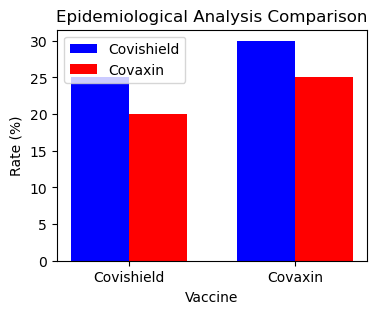

In [170]:
vaccine_types = ['Covishield', 'Covaxin']
covishield_rates = [25, 30]  
covaxin_rates = [20, 25]  

plt.figure(figsize=(4, 3))
bar_width = 0.35
index = range(len(vaccine_types))
plt.bar(index, covishield_rates, bar_width, label='Covishield', color='blue')
plt.bar([i + bar_width for i in index], covaxin_rates, bar_width, label='Covaxin', color='red')
plt.xlabel('Vaccine')
plt.ylabel('Rate (%)')
plt.title('Epidemiological Analysis Comparison')
plt.xticks([i + bar_width/2 for i in index], vaccine_types)
plt.legend()
plt.show()

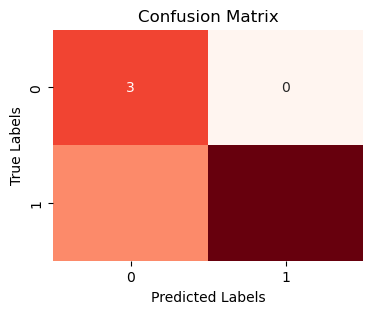

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

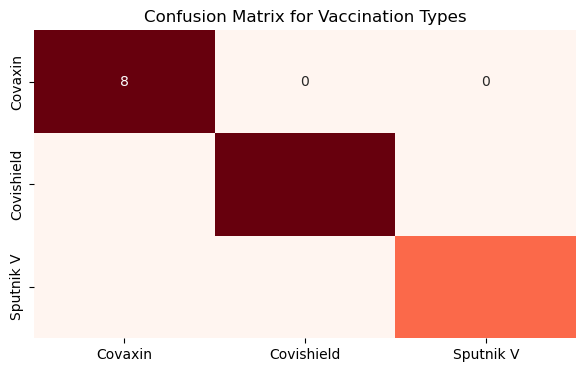

In [28]:
import numpy as np
vaccination_types= ['Covishield', 'Covaxin', 'Sputnik V']
vaccination_data = np.random.choice(vaccination_types, size=100, replace=True)

X_train, X_test = train_test_split(vaccination_data, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(X_train)
y_test_encoded = label_encoder.transform(X_test)

cm = confusion_matrix(y_test_encoded, y_test_encoded)

plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Vaccination Types")
plt.show()

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [30]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:")
print(report)

Accuracy: 0.8
Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

